# 인공 신경망 훑어보기: Artifical Nueral Network
* 인공 신경망에 대한 기본 내용 정리

## 1. 피드 포워드 신경망: Feed-Forward Nueral Network, FFNN
* MLP와 같이 오직 입력층에서 출력층 방향으로 연산이 전개되는 신경망: 순방향 신경망

    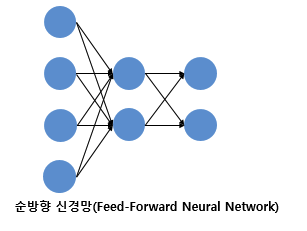
* 은닉층의 출력값을 출력층뿐만 아니라 은닉층의 입력으로도 사용되는 신경망: 순환 신경망

    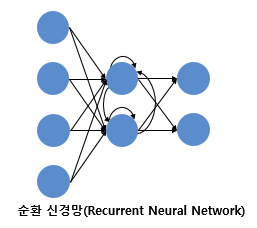

## 2. 전경합층: Fully-connected layer, FC, Dense Layer
* 어떤 층의 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있는 층: 전결합층 또는 완전연결층, 밀집층

## 3. 활성화 함수: Activation Function
* 계단 함수는 실제 뇌를 구성하는 신경 세포 뉴런은 전위가 일정치 이상이 되면 시냅스가 서로 화학적으로 연결되는 모습을 모방한 것입니다.
* 이렇게 은닉층과 출력층의 뉴런에서 출력값을 결정하는 함수를 활성화 함수라고 합니다.

    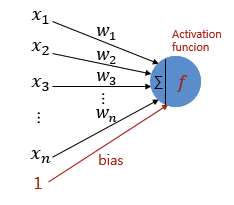
### 1. 활성화 함수의 특징 - 비선형 함수: Nonlinear function
* 활성화 함수는 비선형 함수가 되어야 합니다. 그렇지 않으면 아무리 많은 은닉층을 쌓는다고 한들 결국 선형 함수로 1회 추가한 것과 차이가 없기 때문입니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2. 계단 함수: Step function
* 거의 사용되지 않지만, ANN을 처음 배울 때 접하게 되는 함수입니다.

/var/folders/87/xxwktcx901s56z5ds_qqnktw0000gn/T/ipykernel_7578/2601413359.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


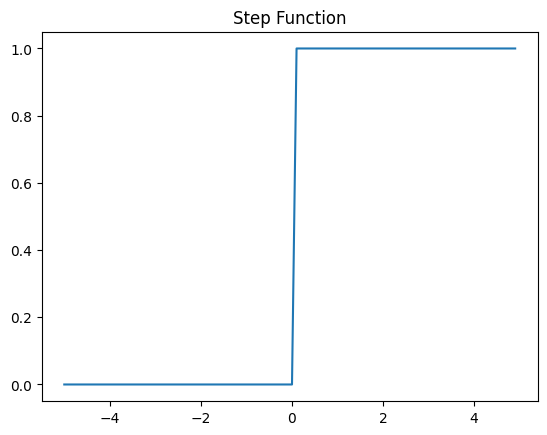

In [2]:
def step(x):
    return np.array(x > 0, dtype=np.int)
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

### 3. 시그모이드 함수(Sigmoid function)와 기울기 소실
* 주황색 구간에선 미분값이 0에 가까운 아주 작은 값입니다. 초록색 구간에서의 미분값은 최대값이 0.25입니다.
* 이 시그모이드 함수를 활성화 함수로 인공 신경망을 쌓는다면, 가중치와 편향을 업데이트하는 과정에서 0에 가까운 값이 누적해서 곱해지게 됩니다.
* 그러면 앞단 층에 기울기(미분값)이 잘 전달되지 않게 됩니다. 이를 **기울기 소실(Vanishing Gradient) 문제**라고 합니다.

    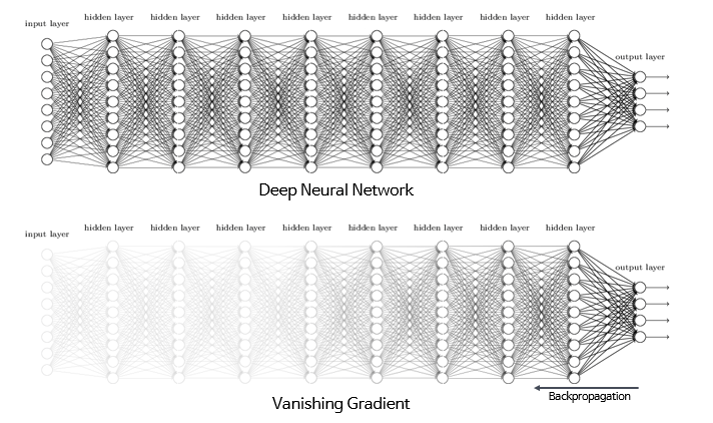
* 결론적으로 시그모이드 함수의 은닉층에서의 사용은 지양됩니다. 주로 이진 분류를 위해 출력층에서 사용됩니다.

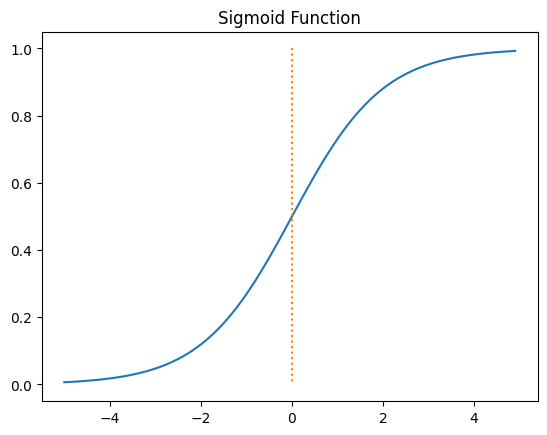

In [3]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

### 4. 하이퍼볼릭탄젠트 함수: Hyperbolic tangent function
* 이 함수 또한 시그모이드 함수와 같은 문제가 발생합니다.
* 그러나 미분값의 최대값은 1로 시그모이드의 최대값인 0.25보다 큽니다.
* 그래서 시그모이드 함수보다는 기울기 소실 증상이 적은 편이며 은닉층에서 시그모이드 함수보다 선호됩니다.

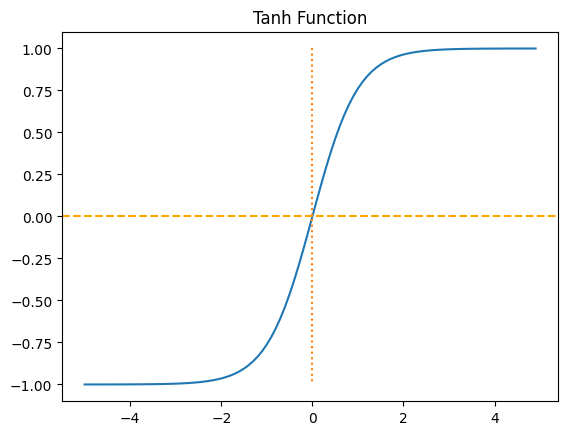

In [4]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

### 5. 렐루 함수: ReLU
* 수식은 f(x) = max(0,x)로 간단합니다.
* 깊은 신경망의 은닉층에서 시그모이드 함수보다 훨씬 더 잘 작동합니다.
* 하지만 입력값이 음수이면 기울기, 즉 미분값도 0이 되는 문제점이 있습니다.
* 이 뉴런은 다시 회생하는 것이 매우 어렵고 이 문제를 죽은 렐루(dying ReLU)라고 합니다.

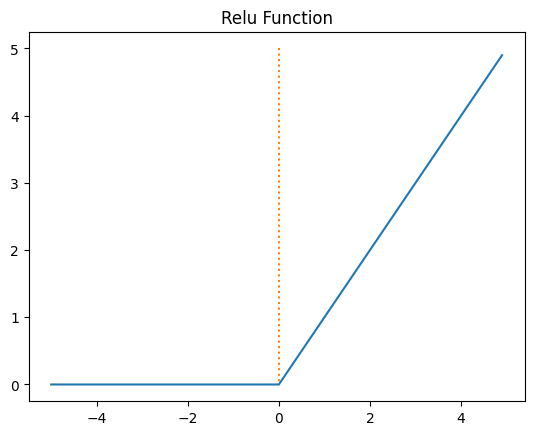

In [5]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

### 6. 리키 렐루: Leaky ReLU
* 위 문제를 보완하기 위해 ReLU의 변형 함수가 등장합니다.
* Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환하도록 되어 있습니다.
* 수식도 f(x) = max(ax,x)로 아주 간단합니다.

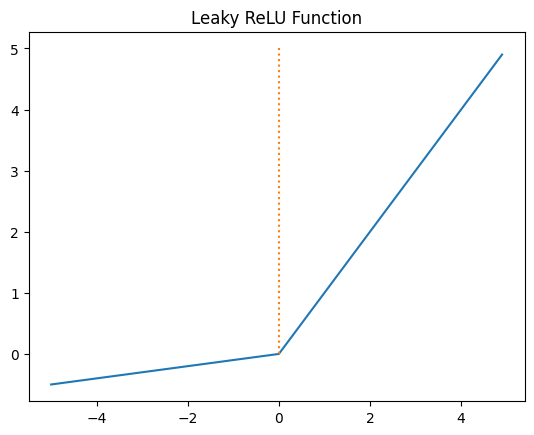

In [6]:
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

### 7. 소프트맥스 함수: Softmax function
* 시그모이드 함수가 두 가지 선택지 중 하나를 고르는 이진 분류 (Binary Classification) 문제에 사용된다면 소프트맥스 함수는 세 가지 이상의 (상호 배타적인) 선택지 중 하나를 고르는 다중 클래스 분류(MultiClass Classification) 문제에 주로 사용됩니다. 
* 다시 말해서 딥 러닝으로 이진 분류를 할 때는 출력층에 앞서 배운 로지스틱 회귀를 사용하고, 딥 러닝으로 다중 클래스 분류 문제를 풀 때는 출력층에 소프트맥스 회귀를 사용한다고 생각할 수 있습니다.

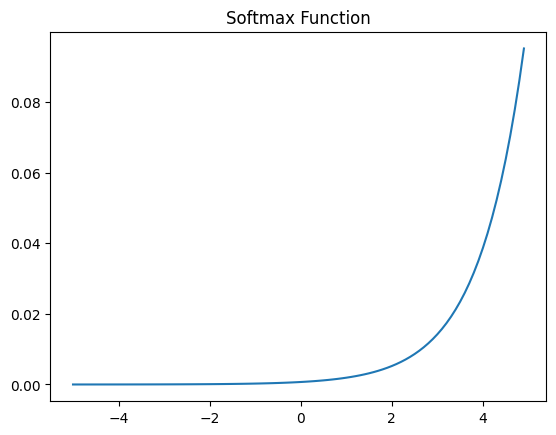

In [7]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()